# SciPy

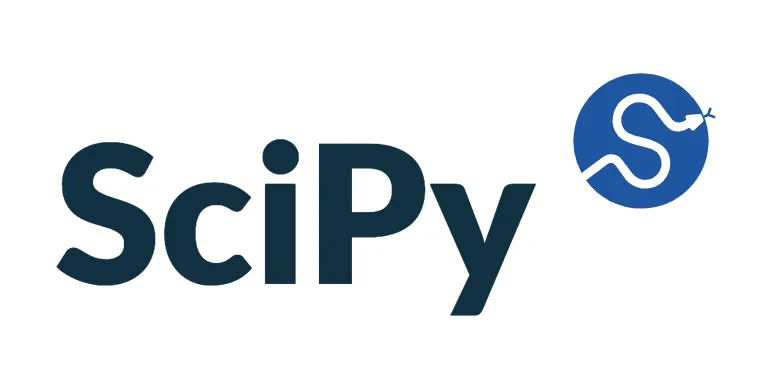

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

## Optimización

La optimización (la búsqueda de mínimos o máximos de una función) es un campo amplio en matemáticas, y la optimización de funciones complejas o con muchas variables puede ser bastante compleja. Aquí solo analizaremos algunos casos muy sencillos. Para una introducción más detallada a la optimización con SciPy, consulte:
 http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Para utilizar el módulo de optimización en scipy primero incluya el módulo `optimize`:


In [23]:
from scipy import optimize

#### Encontrar un minimo

Veamos primero cómo encontrar los mínimos de una función simple de una sola variable:


In [24]:
def f(x):
    return np.cos(x) - 3 * np.exp( -(x - 0.2) ** 2)

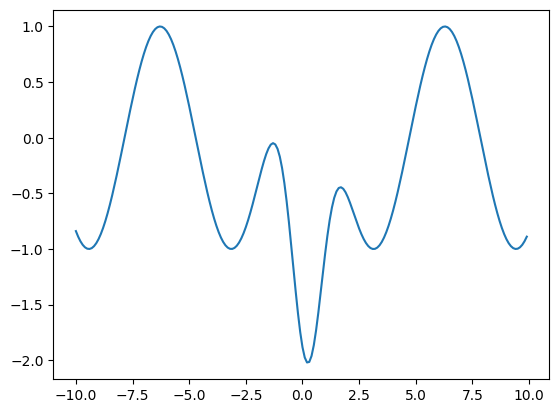

In [25]:
fig, ax  = plt.subplots()
x = np.arange(-10, 10, 0.1)
ax.plot(x, f(x));

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Empieza a buscar en x=1., el mínimo es [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Empieza a buscar en x=2., el mínimo es [3.13847656]


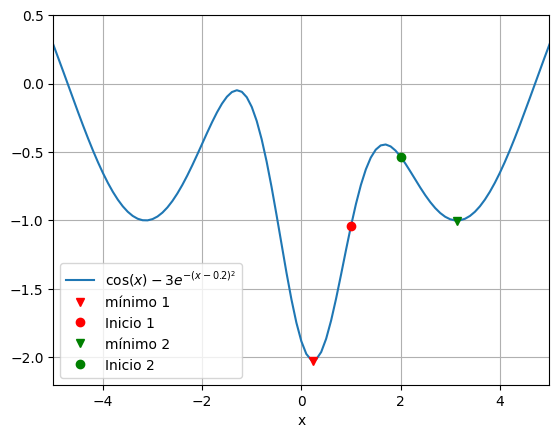

In [26]:
from scipy.optimize import fmin #Minimización multivariable sin derivadas

# encontrar los mínimos de f(x),
# A partir de 1.0 y 2.0 respectivamente
minimum1 = fmin(f, 1.0)
print("Empieza a buscar en x=1., el mínimo es", minimum1)
minimum2 = fmin(f, 2.0)
print("Empieza a buscar en x=2., el mínimo es", minimum2)

# Grafica de la funcion
x = np.arange(-10, 10, 0.1)
y = f(x)
plt.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
plt.xlabel('x')
plt.grid()
plt.axis([-5, 5, -2.2, 0.5])

# añadir minimum1 al gráfico
plt.plot(minimum1, f(minimum1), 'vr',
           label='mínimo 1')
# añadir start1 al gráfico
plt.plot(1.0, f(1.0), 'or', label='Inicio 1')

# añadir minimum2 al gráfico
plt.plot(minimum2,f(minimum2),'vg',\
           label='mínimo 2')
# añadir start2 al gráfico
plt.plot(2.0,f(2.0),'og',label='Inicio 2')

plt.legend(loc='lower left')

#### Dependencia de la Magnetización


En materiales ferromagnéticos sencillos, la magnetización $M(T)$ viene dada por la ecuación trascendental (modelo de Weiss)

$$
M(T) \;=\; N\mu\,\tanh\!\Bigl(\tfrac{\lambda \mu\,M(T)}{k_B\,T}\Bigr)
$$
que en forma reducida se escribe con la magnetización reducida
$$
m = \frac{M}{N\mu},
$$
y la temperatura reducida
$$
t = \frac{T}{T_c},
\quad
T_c = \frac{N\mu^2\lambda}{k_B},
$$
como

$$
m \;=\;\tanh\!\Bigl(\tfrac{m}{t}\Bigr).
$$
Definimos la función

$$
f(m,t) \;=\; \tanh\!\bigl(\tfrac{m}{t}\bigr)\;-\;m,
$$
cuyos ceros $m(t)$ proporcionan la solución física de la magnetización reducida a cada temperatura $(t)$.

*  **$f(m,t)$ vs. $m$ para $t=0.5,1,2$**

A continuación:

1. **Graficamos** $f(m,t)$ en $m\in[0,2.5]$ para los tres valores de $(t)$.  
2. **Encontramos el cero** $m(t)$ con `scipy.optimize.brentq` en el intervalo $[0,2]$.  
3. **Marcamos** en la gráfica el punto $\bigl(m(t),0\bigr)$.




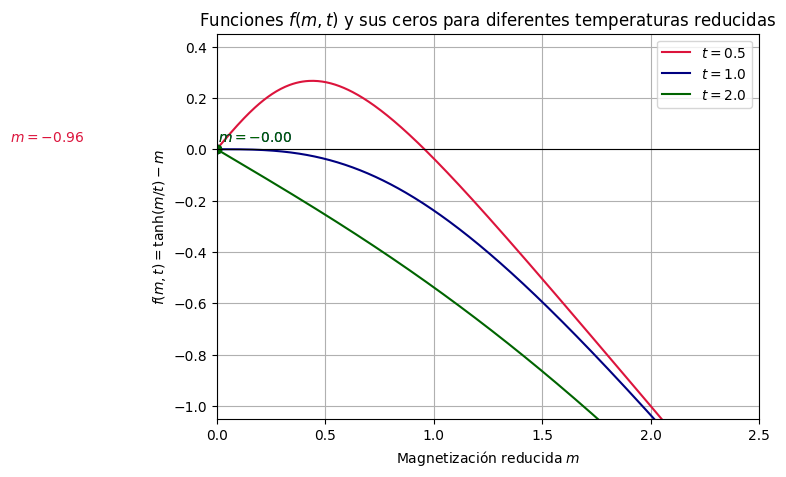

In [32]:
from scipy.optimize import brentq

# Definición de f(m, t)
def f(m, t):
    return np.tanh(m/t) - m

# Valores de temperatura reducida
ts = [0.5, 1.0, 2.0]
colors = ['crimson', 'navy', 'darkgreen']

# Dominio de m
m_vals = np.linspace(0, 2.5, 500)

plt.figure(figsize=(7,5))
for t, c in zip(ts, colors):
    # Evaluar f sobre m
    y = f(m_vals, t)
    plt.plot(m_vals, y, color=c, label=f'$t={t}$')
    # Buscar el cero m* en [0, 2]
    try:
        m_root = brentq(f, -2, 5.0, args=(t,))
        plt.plot(m_root, 0, 'o', color=c)
        plt.text(m_root+0.005, 0.03, f'$m={m_root:.2f}$', color=c)
    except ValueError:
        # No hay raíz distinta de m=0
        pass


# Eje horizontal y vertical
plt.axhline(0, color='black', lw=0.8)
plt.xlabel('Magnetización reducida $m$')
plt.ylabel('$f(m,t)=\\tanh(m/t)-m$')
plt.title('Funciones $f(m,t)$ y sus ceros para diferentes temperaturas reducidas')
plt.ylim(-1.05, 0.45)
plt.xlim(0, 2.5)
plt.legend()
plt.grid(True)
plt.show()

## Ajuste de Curvas (Curve Fitting)

En muchos problemas experimentales o de simulación necesitamos ajustar un modelo matemático $y = f(x; \boldsymbol\theta)$ a un conjunto de datos $\{(x_i,y_i)\}_{i=1}^N$. SciPy ofrece herramientas potentes para resolver este **problema de mínimos cuadrados**, es decir,

$$
\min_{\boldsymbol\theta}\;S(\boldsymbol\theta)
\;=\;
\min_{\boldsymbol\theta}\;\sum_{i=1}^N \bigl[y_i - f(x_i;\boldsymbol\theta)\bigr]^2.
$$


`scipy.optimize.curve_fit`

Queremos ajustar un modelo lineal  
$$
y = a\,x + b
$$
a un conjunto de datos ruidosos $(x_i,y_i)$.

In [33]:
def modelo_lineal(x, a, b):
    return a * x + b

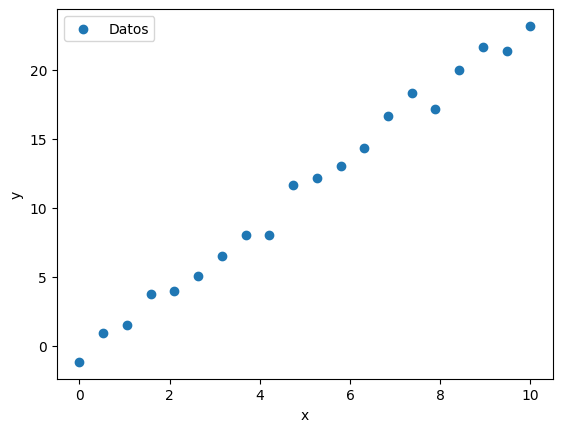

In [36]:
from scipy.optimize import curve_fit

# Parámetros reales
a_true, b_true = 2.5, -1.0

# Datos
x_data = np.linspace(0, 10, 20)
noise = 0.8 * np.random.randn(x_data.size)
y_data = a_true * x_data + b_true + noise

plt.scatter(x_data, y_data, label="Datos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [37]:
# Estimación inicial de parámetros [a, b]
p0 = [1.0, 0.0]

# Ajuste no lineal
popt, pcov = curve_fit(modelo_lineal, x_data, y_data, p0=p0)

# Parámetros ajustados y sus incertidumbres
a_fit, b_fit = popt
sigma_a, sigma_b = np.sqrt(np.diag(pcov))

print(f"a = {a_fit:.3f} ± {sigma_a:.3f}")
print(f"b = {b_fit:.3f} ± {sigma_b:.3f}")

a = 2.438 ± 0.053
b = -0.877 ± 0.311


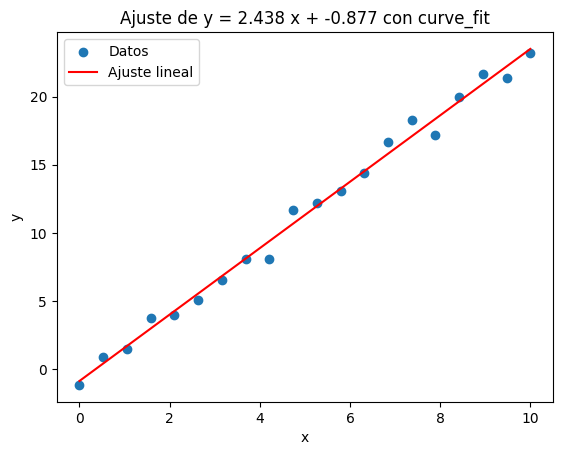

In [38]:
# Línea ajustada
x_fit = np.linspace(0, 10, 100)
y_fit = modelo_lineal(x_fit, a_fit, b_fit)

plt.scatter(x_data, y_data, label="Datos")
plt.plot(x_fit, y_fit, 'r-', label="Ajuste lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Ajuste de y = {a_fit:.3f} x + {b_fit:.3f} con curve_fit")
plt.show()

#### Ajuste de Decaimiento Exponencial del Mesón π


En el experimento de Stetz et al. (1973) se midió el número de desintegraciones $\Delta N$ de mesones $(\pi)$ en intervalos de $\Delta t = 10$ ns, obteniéndose los datos binned que siguen:

| Intervalo $[t_i,t_i+\Delta t >$ (ns) | 0–10 | 10–20 | 20–30 | 30–40 | 40–50 | 50–60 | 60–70 | 70–80 | 80–90 | 90–100 | 100–110 | 110–120 |
|:------------------------------------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:------:|:-------:|:-------:|
| $\Delta N$ (número de decaimientos)   |  30  |  21   |  13   |   7   |   5   |   4   |   3   |   2   |   2   |    1   |    1    |    1    |

La ley teórica de decaimiento exponencial es
$$
N(t) = N_0\,e^{-t/\tau},
$$
con $\tau$ la vida media del mesón $\tau_{\rm tabulado}=2.6\times10^{-8}$ s = 26 ns.


* **a. Ajuste “Lineal” en el Logaritmo**

Tomamos los datos $(t_i, \Delta N_i)$ y formamos  
$$\ln\Delta N_i = \ln N_0 - t_i/\tau$$.  
Un ajuste lineal por mínimos cuadrados a  
$$\ln\Delta N = A + B\,t$$  
nos da  
$$
B = -\frac1\tau,\quad A = \ln N_0.
$$

* **b. Ajuste Directo Exponencial con `curve_fit`**

Usamos  
$$
f(t;N_0,\tau) = N_0\,e^{-t/\tau},
$$  
y `scipy.optimize.curve_fit` para encontrar $(N_0,\tau)$ de forma no lineal.


In [39]:
from scipy.optimize import curve_fit

# Límites de los intervalos [ns]
bins = np.arange(0, 130, 10)

# Conteos en cada intervalo
counts = np.array([30, 21, 13, 7, 5, 4, 3, 2, 2, 1, 1, 1])

# Tomamos el tiempo en el centro de cada bin
t_mid = (bins[:-1] + bins[1:]) / 2

In [41]:
# Ajuste lineal a ln(counts)
# Excluimos bins con conteo=0 para evitar log(0)
mask = counts > 0
t_lin = t_mid[mask]
y_lin = np.log(counts[mask])

In [42]:
# Ajuste lineal: y = A + B t
B, A = np.polyfit(t_lin, y_lin, 1)
tau_lin = -1.0 / B
N0_lin = np.exp(A)

print(f"Ajuste log-lineal: N0 = {N0_lin:.1f}, tau = {tau_lin:.1f} ns")

Ajuste log-lineal: N0 = 27.1, tau = 31.1 ns


In [43]:
# Ajuste no lineal de exponencial
def expo(t, N0, tau):
    return N0 * np.exp(-t/tau)

popt, pcov = curve_fit(expo, t_mid, counts, p0=[N0_lin/2, tau_lin])
N0_cf, tau_cf = popt
err = np.sqrt(np.diag(pcov))

print(f"curve_fit: N0 = {N0_cf:.1f} ± {err[0]:.1f}, tau = {tau_cf:.1f} ± {err[1]:.1f} ns")

curve_fit: N0 = 37.4 ± 1.1, tau = 23.7 ± 1.0 ns


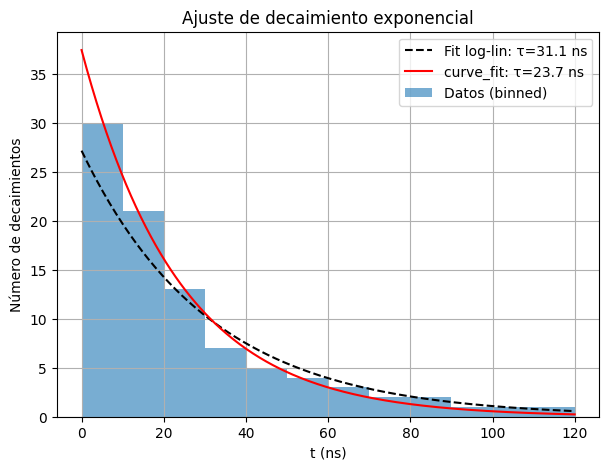

In [44]:
#Plot datos y ajustes
t_fine = np.linspace(0, 120, 300)

plt.figure(figsize=(7,5))
# Histograma de datos
plt.bar(t_mid, counts, width=10, alpha=0.6, label='Datos (binned)')

# Curva ajuste log-lineal (reconvertida a escala normal)
plt.plot(t_fine, N0_lin * np.exp(-t_fine/tau_lin),
         'k--', label=f'Fit log-lin: τ={tau_lin:.1f} ns')

# Curva ajuste con curve_fit
plt.plot(t_fine, expo(t_fine, N0_cf, tau_cf),
         'r-', label=f'curve_fit: τ={tau_cf:.1f} ns')

plt.xlabel('t (ns)')
plt.ylabel('Número de decaimientos')
plt.title('Ajuste de decaimiento exponencial')
plt.legend()
plt.grid(True)
plt.show()

## Interpolación

La interpolación es simple y conveniente en scipy: la función `interp1d`, cuando se le dan matrices que describen datos X e Y, devuelve un objeto que se comporta como una función que puede llamarse para un valor arbitrario de x (en el rango cubierto por X), y devuelve el valor y interpolado correspondiente:

In [45]:
from scipy.interpolate import *

In [46]:
def f(x):
    return np.sin(x)

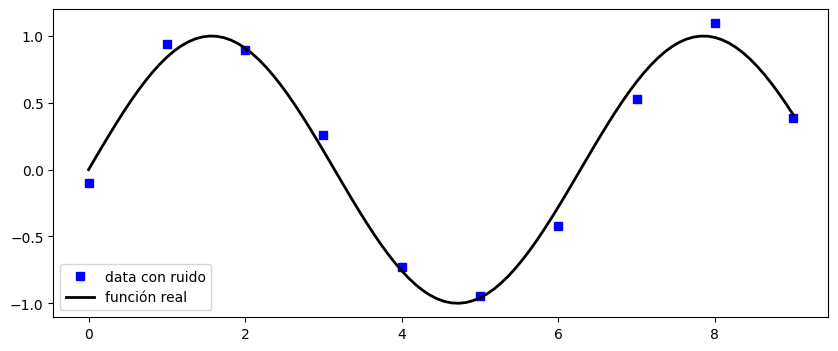

In [52]:
n = np.arange(0, 10)
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simular la medición con ruido
y_real = f(x)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='data con ruido')
ax.plot(x, y_real, 'k', lw=2, label='función real')
ax.legend(loc=3);

In [53]:
linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

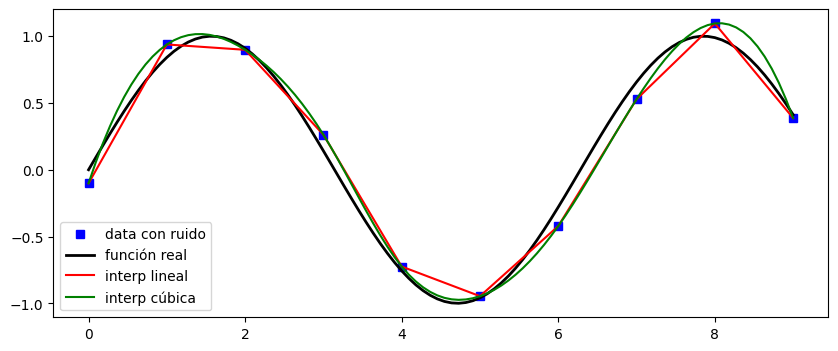

In [56]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='data con ruido')
ax.plot(x, y_real, 'k', lw=2, label='función real')
ax.plot(x, y_interp1, 'r', label='interp lineal')
ax.plot(x, y_interp2, 'g', label='interp cúbica')
ax.legend(loc=3);

#### Ajuste e Interpolación de Secciones Transversales Resonantes


Se dispone de los valores experimentales de la sección transversal $(g(E_i))$ (en milibarn, mb) a distintas energías $(E_i)$ (en MeV), con errores absolutos $(\sigma_i)$:

| $i$ | 1   | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |
|:-----:|:---:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
| $E_i$ (MeV)     | 0   | 25   | 50   | 75   | 100  | 125  | 150  | 175  | 200  |
| $g(E_i)$ (mb)   | 10.6| 16.0 | 45.0 | 83.5 | 52.8 | 19.9 | 10.8 | 8.25 | 4.7  |
| Error $\sigma_i$ (mb) | 9.34| 17.9 | 41.5 | 85.5 | 51.5 | 21.5 | 10.8 | 6.29 | 4.14 |

Queremos comparar tres métodos:

1. **Interpolación de Lagrange** con un polinomio de grado 8 que pase por todos los puntos.
2. **Splines cúbicos** continuos de segunda derivada cero en extremos.
3. **Ajuste por mínimos cuadrados** de una parábola $(p(E)=aE^2 + bE + c)$.


a. **Interpolación de Lagrange**

El polinomio de Lagrange de grado $(n)$ que interpola $(\{(E_i,g_i)\})$ es

$$
P(E) = \sum_{i=1}^9 g_i \,\ell_i(E),
\quad
\ell_i(E) = \prod_{\substack{j=1\\j\neq i}}^9 \frac{E - E_j}{E_i - E_j}.
$$



b. **Splines cúbicos**

Buscamos $(S(E))$ tal que en cada subintervalo $([E_i,E_{i+1}])$ sea un polinomio de grado 3, y que $(S)$, $(S')$ y $(S'')$ sean continuas. En los extremos imponemos condiciones de “segunda derivada nula” (natural spline).



c. **Ajuste parabólico por mínimos cuadrados**

Proponemos
$$
p(E) = a\,E^2 + b\,E + c
$$
y minimizamos
$$
\chi^2(a,b,c) = \sum_{i=1}^9 \bigl[g(E_i) - p(E_i)\bigr]^2.
$$
La solución cierra en la norma Euclídea usando $(\mathrm{polyfit}(E_i,g_i,2))$.


In [57]:
from scipy.interpolate import lagrange, CubicSpline

# Datos experimentales
E = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200], dtype=float)
g = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7], dtype=float)

In [63]:
# Polinomio de Lagrange
poly_L = lagrange(E, g)

# Spline cúbica natural
spline = CubicSpline(E, g, bc_type='natural')

# Ajuste parabólico por mínimos cuadrados
coef_parab = np.polyfit(E, g, 2)  # [a, b, c]
poly_parab = np.poly1d(coef_parab)

# Dominio
E_fino = np.linspace(E.min(), 1.5*E.max(), 500)

# Evaluaciones
g_L = poly_L(E_fino)
g_s = spline(E_fino)
g_p = poly_parab(E_fino)

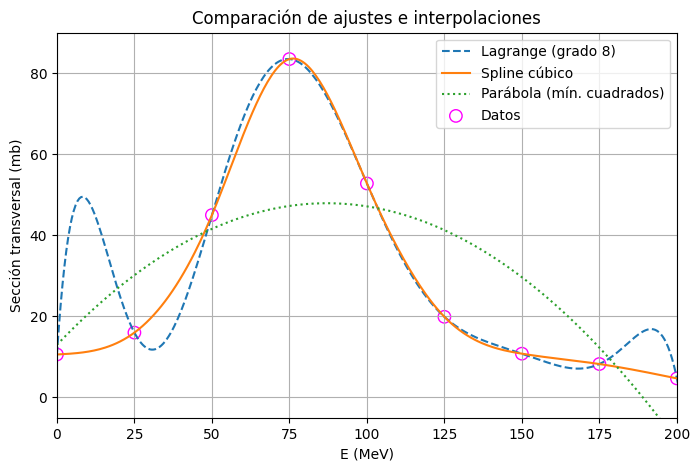

In [65]:
# Gráfico
plt.figure(figsize=(8,5))
plt.plot(E_fino, g_L, '--', label='Lagrange (grado 8)')
plt.plot(E_fino, g_s, '-' , label='Spline cúbico')
plt.plot(E_fino, g_p, ':' , label='Parábola (mín. cuadrados)')
plt.scatter(E, g, facecolors='none', edgecolors='magenta', s=80, label='Datos')
plt.xlabel('E (MeV)')
plt.ylabel('Sección transversal (mb)')
plt.title('Comparación de ajustes e interpolaciones')
plt.legend()
plt.grid(True)
plt.ylim(-5, 90)
plt.xlim(0, 200)
plt.show()

## Estadistica

El módulo `scipy.stats` contiene una gran cantidad de distribuciones estadísticas, funciones estadísticas y pruebas. Para consultar la documentación completa de sus funciones, consulte http://docs.scipy.org/doc/scipy/reference/stats.html.


 También existe un paquete de Python muy potente para el modelado estadístico llamado statsmodels. Consulte http://statsmodels.sourceforge.net para obtener más información.


In [66]:
from scipy import stats

In [67]:
# crear una variable aleatoria (discreta) con distribución Poissoniana

X = stats.poisson(3.5) # distribución de fotones para un estado coherente con n=3,5 fotones

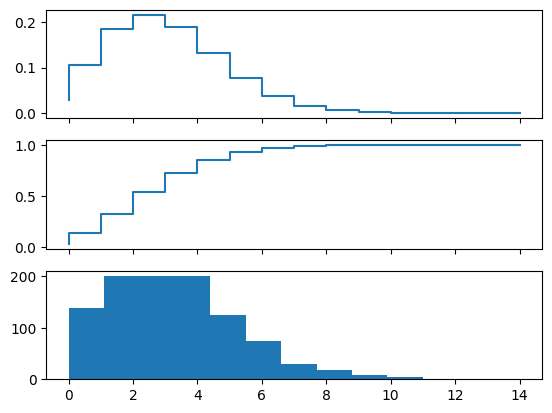

In [68]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# Graficar la función de masa de probabilidad (PMF)
axes[0].step(n, X.pmf(n))

# Graficar la función de distribución acumulada (CDF)
axes[1].step(n, X.cdf(n))

# Trazar el histograma de 1000 realizaciones aleatorias de la variable estocástica X
axes[2].hist(X.rvs(size=1000));

In [69]:
X.mean(), X.std(), X.var() # Distribución de Poisson

(np.float64(3.5), np.float64(1.8708286933869707), np.float64(3.5))

#### Regresión lineal



Existen diversas funciones estadísticas en `scipy.stats`.

Por ejemplo, `scipy.stats.linregress` implementa una regresión lineal simple.



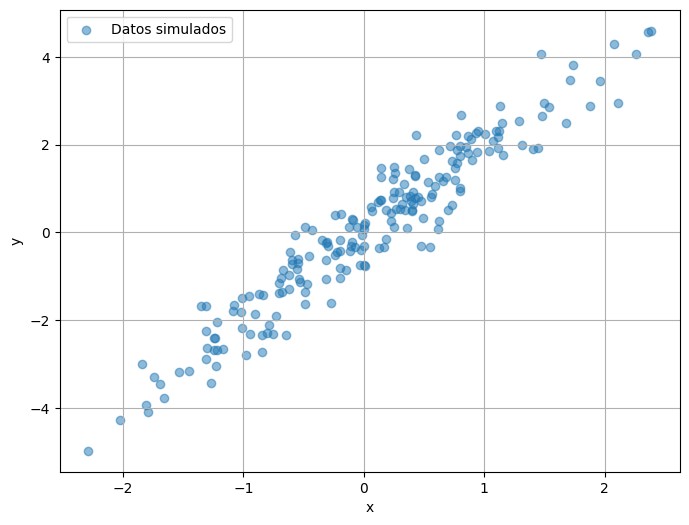

In [70]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.5 * np.random.randn(200)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Datos simulados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(np.float64(1.9488269298223218), np.float64(-0.005895499864889284))

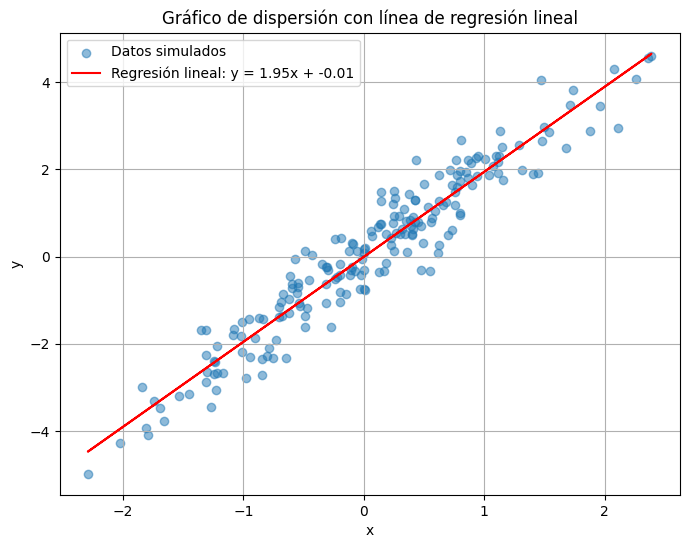

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Datos simulados')
plt.plot(x, gradient * x + intercept, color='red', label=f'Regresión lineal: y = {gradient:.2f}x + {intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersión con línea de regresión lineal')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
r_value

np.float64(0.9591126705105743)

## Algebra Lineal

El módulo de álgebra lineal contiene muchas funciones relacionadas con matrices, incluidas la resolución de ecuaciones lineales, solucionadores de valores propios, funciones matriciales (por ejemplo, exponenciación matricial), varias descomposiciones diferentes (SVD, LU, Cholesky), etc.

La documentación detallada está disponible en: http://docs.scipy.org/doc/scipy/reference/linalg.html

Aquí veremos cómo utilizar algunas de estas funciones:






In [74]:
import scipy
from scipy.linalg import *
from numpy.random import rand

### Matrices dispersas


Las matrices dispersas suelen ser útiles en simulaciones numéricas que manejan sistemas grandes, si el problema puede describirse en forma matricial, donde las matrices o vectores contienen principalmente ceros. Scipy ofrece un buen soporte para matrices dispersas, con operaciones básicas de álgebra lineal (como resolución de ecuaciones, cálculo de valores propios, etc.).


Cuando creamos una matriz dispersa, tenemos que elegir en qué formato debe almacenarse. Por ejemplo,


In [76]:
from scipy.sparse import *

In [77]:
# matriz densa
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [78]:
# convertir de denso a sparse
A = csr_matrix(M)
A

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [79]:
# convertir de sparse a denso
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

Una forma más eficiente de crear matrices dispersas: crear una matriz vacía y rellenarla mediante indexación de matrices (evita crear una matriz densa potencialmente grande)


In [81]:
A = lil_matrix((4,4)) # matriz sparse vacía de 4x4

A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<List of Lists sparse matrix of dtype 'float64'
	with 6 stored elements and shape (4, 4)>

In [82]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

Podemos calcular con matrices dispersas lo mismo que con matrices densas:


In [83]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [84]:
(A * A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [85]:
A.dot(A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])

In [86]:
v = np.array([1,2,3,4])[:,np.newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [87]:
# multiplicación de matriz dispersa - vector denso
A * v

array([[1.],
       [6.],
       [5.],
       [5.]])

In [88]:
# Mismo resultado con multiplicación de matriz densa - vector denso
A.todense() * v

matrix([[1.],
        [6.],
        [5.],
        [5.]])

#### Ejemplo ODE matrices

Podemos ver que obtenemos la velocidad de lanzamiento correcta usando el método de diferencias finitas.

Para familiarizarte con el método, veamos otro ejemplo.


 Usando el método de diferencias finitas resolveremos el siguiente problema lineal de valor límite.


$$ y'' = -4y +4x $$

Con las condiciones de contorno $y(0) = 0$ e $y'(\pi/2)=0$. La solución exacta del problema es $y=x-sin2x$.


Grafiquemos los errores contra los n puntos de la cuadrícula (n de 3 a 100) para el punto de contorno $y(\pi/2)$.


Usando las derivadas aproximadas de diferencias finitas, tenemos

$$ y_0 = 0$$

$$ y_{i-1} - 2y_i + y_{i+1} + 4y_i h^2=4x_i h^2 , \;i = 1, 2, ..., n-1$$

$$ 2y_{n-1}-2y_n + 4y_nh^2=4x_nh^2$$

La última ecuación se deriva del hecho de que $\frac{y_{n+1}-y_{n-1}}{2h} = 0$ (la condición de contorno $y'(\pi/2)=0$). Por lo tanto, $y_{n+1}=y_{n-1}$.

Si usamos notación matricial, tendremos:


$$\begin{bmatrix}
1 & 0 & \dots & \dots & 0\\
1 & -2+4h^2 & 1 & \dots & 0 \\
\vdots & \ddots & \ddots & \ddots & \vdots\\
0 & \dots & 1 & -2+4h^2 & 1 \\
0 & \dots & \dots & 2 &-2+4h^2
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ \vdots \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\4h^2x_1 \\ \vdots \\ 4h^2x_{n-1} \\4h^2x_{n}\end{array}\right]$$

In [89]:
# Definamos la matriz A
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)

    # A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Definamos b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]

    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = scipy.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)

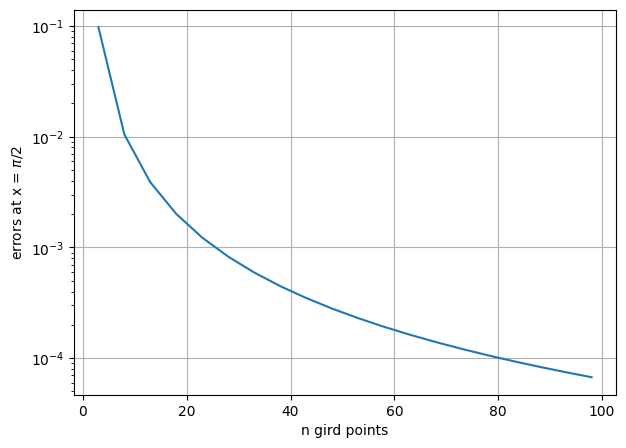

In [90]:
plt.figure(figsize = (7,5))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.grid()
plt.show()

#### Ecuación de Calor en una Barra de Aluminio


Queremos resolver la distribución de temperatura $(T(x,t))$ en una barra de aluminio de longitud $(L=1)$ m:

La ecuación de calor 1D es
$$
\frac{\partial T}{\partial t}
= \frac{K}{C\,\rho}\,\frac{\partial^2 T}{\partial x^2},
$$
Si \(K\) es constante, se simplifica a

$$
\frac{\partial T}{\partial t}
= \alpha\,\frac{\partial^2 T}{\partial x^2},
\quad
\alpha = \frac{K}{\rho\,C}
\quad\text{(difusividad térmica).}
$$

Para aluminio típicamente
$$
K = 237\;\tfrac{\rm W}{\rm m\,K},\;
\rho = 2700\;\tfrac{\rm kg}{\rm m^3},\;
C = 900\;\tfrac{\rm J}{\rm kg\,K},
\quad
\alpha \approx 9.78\times10^{-5}\;\tfrac{\rm m^2}{\rm s}.
$$

- **Condiciones de Dirichlet** (extremos mantenidos a temperatura de referencia):
  $$
  T(0,t) = 0,\quad T(L,t) = 0
  \quad (\text{por ejemplo, extremos en baño frío}).
  $$
- **Condición inicial** (temperatura uniforme al inicio):
  $$
  T(x,0) = T_{\rm init},
  \quad
  T_{\rm init} = 100\;\rm K.
  $$

Usaremos una **esquema explícito**:  
Dividimos la barra en $(N_x)$ subintervalos de longitud $(\Delta x = L/(N_x-1))$ y avanzamos en el tiempo con paso $(\Delta t)$. Definimos la aproximación numérica

$$
T_i^j \approx T\bigl(x_i,j\,\Delta t\bigr),
\quad
x_i = i\,\Delta x,\;i=0,1,\dots,N_x-1.
$$

La segunda derivada espacial se discretiza por diferencias centrales:

$$
\frac{\partial^2T}{\partial x^2}
\Big|_{x_i}\approx
\frac{T_{i+1}^j - 2\,T_i^j + T_{i-1}^j}{(\Delta x)^2}.
$$

El avance explícito en el tiempo es

$$
T_i^{\,j+1}
= T_i^j \;+\; \underbrace{\alpha\,\frac{\Delta t}{(\Delta x)^2}}_{=\eta}\,
\bigl(T_{i+1}^j - 2\,T_i^j + T_{i-1}^j\bigr).
$$

Aquí
$$
\eta = \frac{\alpha\,\Delta t}{(\Delta x)^2}
= \frac{K\,\Delta t}{\rho\,C\,(\Delta x)^2}.
$$

* **Condición de Estabilidad**

Para que el esquema explícito sea estable (no produzca oscilaciones crecientes) debe cumplirse

$$
\eta \;\le\; \tfrac12
\quad\Longrightarrow\quad
\Delta t \;\le\;\frac{(\Delta x)^2}{2\,\alpha}.
$$

En la implementación se suele tomar $(\Delta t = c\,(\Delta x)^2/\alpha)$ con $(c<\tfrac12)$; por ejemplo $(c=0.5)$.

1. **Malla espacial**: $(x = [0,\Delta x,2\Delta x,\dots,L])$.  
2. **Inicialización**: $(T_i^0 = T_{\rm init})$ para $(i=1,\dots,N_x-2)$; $(T_0^j=T_{N_x-1}^j=0)$.  
3. **Bucle temporal**:  
   - Para cada $(j)$, actualizar $(T_i^{j+1})$ para $(i=1,\dots,N_x-2)$ según la fórmula explícita.  
   - Reimponer bordes $(T_0=T_{N_x-1}=0)$.  
4. **Visualización**: guardar y graficar perfiles $(T(x,t_j))$ en instantes seleccionados.

Con este planteo tienes la base teórica correcta y completa para implementar el esquema explícito de la ecuación de calor en 1D.  


In [103]:
# Parámetros físicos
K = 237.0         # conductividad [W/(m·K)]
C = 900.0         # calor específico [J/(kg·K)]
rho = 2700.0      # densidad [kg/m³]
alpha = K/(C*rho) # difusividad térmica [m²/s]

# Dominio espacial y temporal
L = 1.0           # longitud de la barra [m]
Nx = 101          # número de puntos en x
dx = L/(Nx-1)
x = np.linspace(0, L, Nx)

# Tiempo de simulación y paso (explícito estable)
dt = 0.5 * dx**2 / alpha
t_max = 20.0      # tiempo total de simulación [s]
Nt = 5*int(t_max/dt)

# Coeficiente eta
eta = alpha * dt / dx**2

# Inicialización de la temperatura (dos columnas: pasado y presente)
T = np.zeros((Nx, 2))
T[:,1] = 100.0    # condición inicial: 100 K en todo x
T[0,:] = 0.0      # contornos en 0 K
T[-1,:] = 0.0

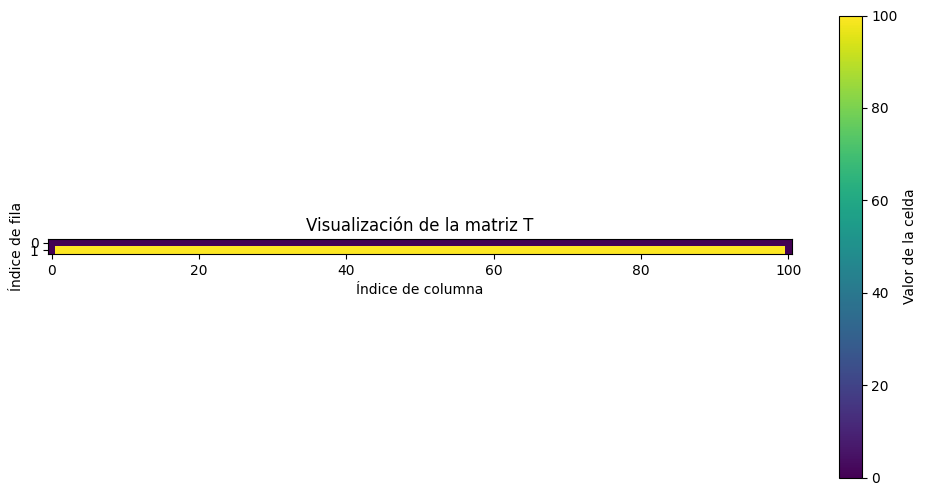

In [104]:
# Visualizar la matriz usando imshow
plt.figure(figsize=(12,6))
plt.imshow(T.T, cmap='viridis', origin='upper')
plt.title('Visualización de la matriz T')
plt.colorbar(label='Valor de la celda')
plt.xlabel('Índice de columna')
plt.ylabel('Índice de fila')
plt.show()

In [105]:
# Determinamos los pasos en los que guardaremos instantáneas
n_snapshots = 5
pasos_guardar = np.linspace(0, Nt, n_snapshots+1, dtype=int)

# Preparamos lista para almacenar las temperaturas
snapshots = []

# Iteración en el tiempo
for j in range(Nt+1):
    # Guardar si estamos en un paso de snapshot
    if j in pasos_guardar:
        # Guardamos la copia de la columna "presente"
        snapshots.append((j*dt, T[:,1].copy()))

    # Aplicamos el esquema explícito (solo en interior)
    T[1:-1,0] = T[1:-1,1] + eta * (
        T[2:  ,1] - 2*T[1:-1,1] + T[0:-2,1]
    )
    # Reimponemos contornos
    T[0,0] = 0.0;  T[-1,0] = 0.0

    # Desplazamos columnas: el presente pasa a pasado
    T[:,1], T[:,0] = T[:,0], T[:,1]

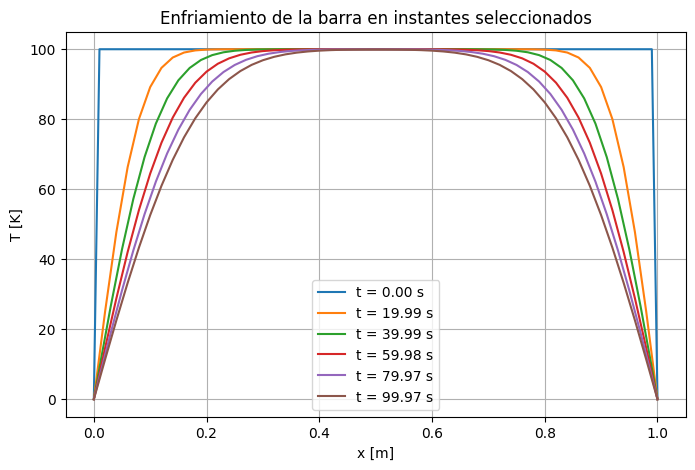

In [106]:
# Graficamos todas las instantáneas en una sola figura
plt.figure(figsize=(8,5))
for t, T_snap in snapshots:
    plt.plot(x, T_snap, label=f"t = {t:.2f} s")
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.title('Enfriamiento de la barra en instantes seleccionados')
plt.legend()
plt.grid(True)
plt.show()

#### Método de Lines

$$
\frac{d\mathbf{T}}{dt} = \alpha\,L\,\mathbf{T},
$$

donde $(L)$ es la matriz tridiagonal que representa la segunda derivada espacial con condiciones de Dirichlet $(T_0=T_{N_x-1}=0)$.


In [107]:
from scipy.integrate import solve_ivp
from scipy.sparse import diags
from scipy.sparse.linalg import splu

# Parámetros físicos
K = 237.0        # [W/(m K)]
C = 900.0        # [J/(kg K)]
rho = 2700.0     # [kg/m^3]
alpha = K/(C*rho)

# Mallado espacial
Lx = 1.0
Nx = 101
dx = Lx/(Nx-1)
x = np.linspace(0, Lx, Nx)

# Construimos la matriz tridiagonal (en formato disperso CSR)
# -2 en la diagonal principal, +1 en las sub/super-diagonales
data = [np.ones(Nx-1), -2*np.ones(Nx), np.ones(Nx-1)]
offsets = [-1, 0, 1]
L = diags(data, offsets, shape=(Nx, Nx), format='csr') / dx**2

# Imponemos Dirichlet en los extremos: fila 0 y fila Nx-1 como identidad
L = L.tolil()
L[0, :] = 0; L[0, 0] = 1
L[-1, :] = 0; L[-1, -1] = 1
L = L.tocsr()

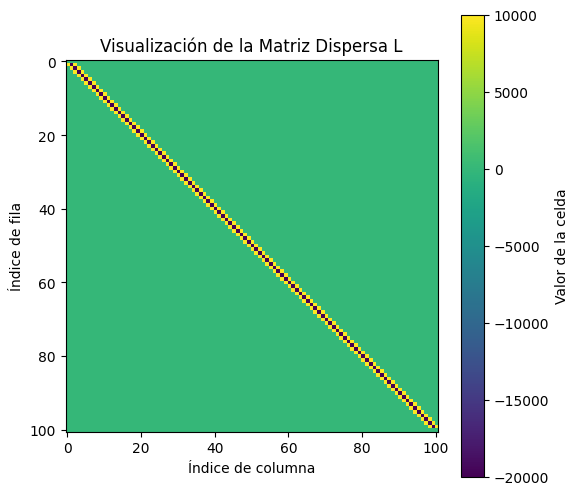

In [108]:
# Conviértela a una matriz densa para visualización
L_dense = L.todense()

# Visualizar la matriz usando imshow
plt.figure(figsize=(6,6))
plt.imshow(L_dense, cmap='viridis', origin='upper')
plt.title('Visualización de la Matriz Dispersa L')
plt.colorbar(label='Valor de la celda')
plt.xlabel('Índice de columna')
plt.ylabel('Índice de fila')
plt.show()

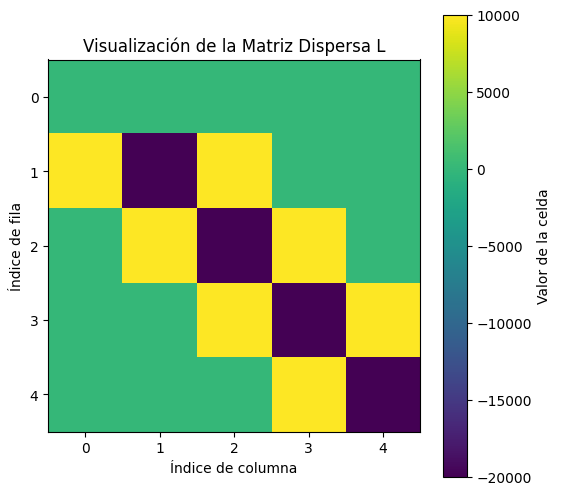

In [109]:
# Visualizar la matriz usando imshow
plt.figure(figsize=(6,6))
plt.imshow(L_dense[0:5,0:5], cmap='viridis', origin='upper')
plt.title('Visualización de la Matriz Dispersa L')
plt.colorbar(label='Valor de la celda')
plt.xlabel('Índice de columna')
plt.ylabel('Índice de fila')
plt.show()

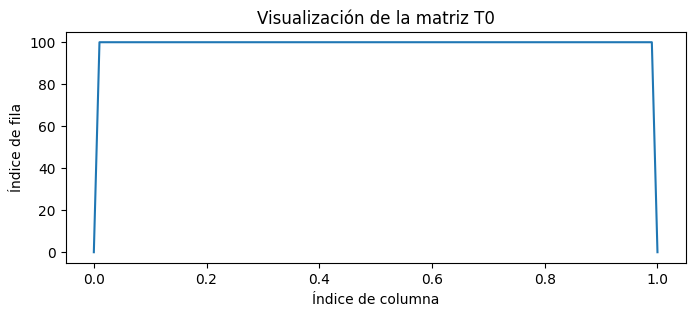

In [110]:
# Condición inicial: 100 K en todo el interior, 0 en los extremos
T0 = np.zeros(Nx)
T0[1:-1] = 100.0

# Visualizar la matriz usando imshow
plt.figure(figsize=(8,3))
plt.plot(x,T0)
plt.title('Visualización de la matriz T0')
plt.xlabel('Índice de columna')
plt.ylabel('Índice de fila')
plt.show()

In [117]:
# RHS como multiplicación por la matriz dispersa
def rhs(t, T):
    return alpha * (L @ T)

# Intervalo temporal y puntos de salida
t_span = (0.0, 120.0)
t_eval = np.linspace(*t_span, 300)

# Integración (usamos un método implícito adecuado para rigidez ligera)
sol = solve_ivp(rhs, t_span, T0,
                method='BDF',      # método implícito multietapa
                t_eval=t_eval,
                atol=1e-6, rtol=1e-6)

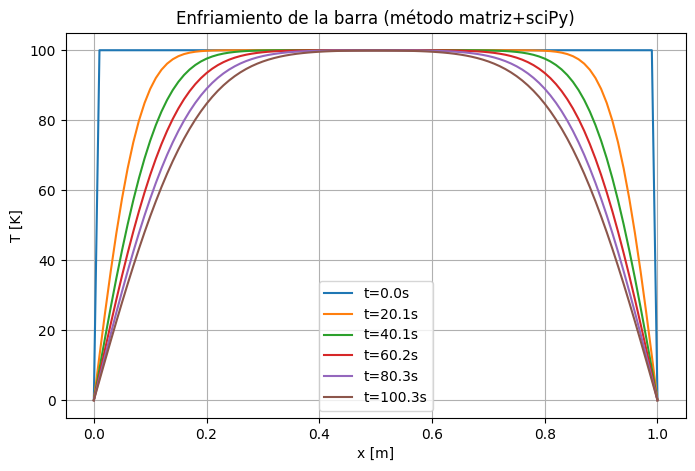

In [118]:
plt.figure(figsize=(8,5))
for i, T in enumerate(sol.y.T[::50]):  # muestro 4-5 curvas
    t = sol.t[::50][i] #secuencia[start:stop:step]
    plt.plot(x, T, label=f"t={t:.1f}s")
plt.xlabel('x [m]')
plt.ylabel('T [K]')
plt.title('Enfriamiento de la barra (método matriz+sciPy)')
plt.legend()
plt.grid(True)
plt.show()

# Gracias por si participación